In [104]:
import pandas as pd
import json
import ast

In [105]:
def extraer_codebleu(valor):
    if isinstance(valor, str):
        try:
            dic = ast.literal_eval(valor)
            return dic.get('codebleu')
        except (ValueError, SyntaxError):
            return None
    return None 

def readDataset(file_name0):
    dataset0 = pd.read_csv(file_name0, sep="\t", encoding='latin-1')
    dataset0['CodeBleuScore_Real'] = dataset0['CodeBleuScore'].apply(extraer_codebleu)
    return dataset0

In [106]:
baselineDataset = readDataset("results-baseline_00_00_002_deepseek-r1-distill-qwen-7b.csv")
modifiquedPromptDataset = readDataset("results-test_2025-04-17 07_08_59_deepseek-r1-distill-qwen-7b_persona001-programmer.csv")

In [107]:
dataset = pd.merge(baselineDataset, modifiquedPromptDataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('_baseline', '_test0'))
dataset.dropna()

,Prompt-ID,Prompt_baseline,Baseline_baseline,Result_baseline,CodeResult_baseline,CodeBleuScore_baseline,BleuScore_baseline,ExactMatchScore_baseline,CodeBleuScore_Real_baseline,Prompt_test0,Baseline_test0,Result_test0,CodeResult_test0,CodeBleuScore_test0,BleuScore_test0,ExactMatchScore_test0,CodeBleuScore_Real_test0
0,0,List < Integer > function ( MVariable arg0 ) {...,returns all the indices of statements where v ...,"<think>\nOkay, I need to write a Java method b...",import java.util.ArrayList;import java.util.Li...,"{'codebleu': 0.13445264562418258, 'ngram_match...",0.002052,0,0.134453,List < Integer > function ( MVariable arg0 ) {...,returns all the indices of statements where v ...,"<think>\nOkay, I'm looking at the user's query...",import static java.lang.reflectLineNumberIndex...,"{'codebleu': 0.19299945657533757, 'ngram_match...",0.000703,0,0.192999
1,1,"Map . Entry < K , V > [ ] function ( Map < K ,...",return the map entries as instances of map.ent...,"<think>\nOkay, I need to write Java code that ...","public static Object[] entry(Map<K, V> arg0) {...","{'codebleu': 0.05674865961438244, 'ngram_match...",0.005251,0,0.056749,"Map . Entry < K , V > [ ] function ( Map < K ,...",return the map entries as instances of map.ent...,"<think>\nOkay, I need to figure out how to wri...",public static Map.Entry[] mapEntries(Map<? ext...,"{'codebleu': 0.050002097410162594, 'ngram_matc...",0.007229,0,0.050002
2,2,"void function ( IFigure arg0 , LayoutManager a...",sets the current active layout manager concode...,"<think>\nOkay, so I'm trying to help write thi...","void figureSetLayoutManager(Figure arg0, Layou...","{'codebleu': 0.0687248301996719, 'ngram_match_...",0.002730,0,0.068725,"void function ( IFigure arg0 , LayoutManager a...",sets the current active layout manager concode...,"<think>\nOkay, so the user provided some C++ c...","void voidFunction(Argument<Figure> arg0, Argum...","{'codebleu': 0.2608204700847869, 'ngram_match_...",0.002029,0,0.260820
3,3,"Student function ( File arg0 , JAXBContext arg...",creates a student object using the given stude...,"<think>\nOkay, I need to write Java code based...",package com.example; // Replace with appropria...,"{'codebleu': 0.25, 'ngram_match_score': 0, 'we...",0.002077,0,0.250000,"Student function ( File arg0 , JAXBContext arg...",creates a student object using the given stude...,"<think>\nOkay, let's break down what the user ...",import javax.xml.bindUnmarshaller;import javax...,"{'codebleu': 0.08634279733744889, 'ngram_match...",0.001714,0,0.086343
4,4,ResourceEditPropertyBuilder function ( boolean...,indicate if property is in testing mode concod...,"<think>\nOkay, I need to write Java code for t...",public class Resource { private boolean isT...,"{'codebleu': 0.37434831916571704, 'ngram_match...",0.001499,0,0.374348,ResourceEditPropertyBuilder function ( boolean...,indicate if property is in testing mode concod...,"<think>\nOkay, so I need to write Java code fo...",import java.util enums;public class ResourceEd...,"{'codebleu': 0.15616375014208828, 'ngram_match...",0.000586,0,0.156164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,94,void function ( float arg0 ) { width = arg0 ; ...,set the width for this box . concode_field_sep...,"<think>\nOkay, so I need to write a Java metho...",public class YourClassName { private static...,"{'codebleu': 0.051749823988238, 'ngram_match_s...",0.005646,0,0.051750,void function ( float arg0 ) { width = arg0 ; ...,set the width for this box . concode_field_sep...,"<think>\nOkay, so the user provided this C-lik...",class MyClass { private float width; voi...,"{'codebleu': 0.13399987699328225, 'ngram_match...",0.007104,0,0.134000
87,95,Object function ( ) { return value ; }\n\n Wri...,gets the value from the pair . concode_field_s...,"<think>\nOkay, I need to write Java code that ...",public class Function { public String funct...,"{'codebleu': 0.2548228431466042, 'ngram_match_...",0.008230,0,0.254823,Object functio

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

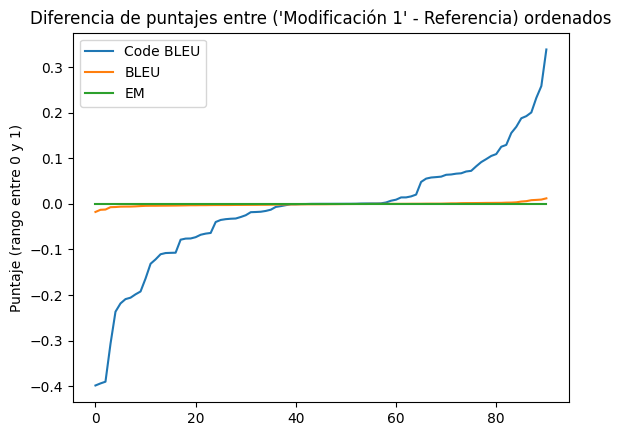

In [108]:
import matplotlib.pyplot as plt

dataset["CodeBleu_Dif"] = dataset["CodeBleuScore_Real_test0"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif"] = dataset["BleuScore_test0"] - dataset["BleuScore_baseline"]
dataset["EM_Dif"] = dataset["ExactMatchScore_test0"] - dataset["ExactMatchScore_baseline"]
CodeBleu_Dif = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
Bleu_Dif = dataset.sort_values(by=["Bleu_Dif"])["Bleu_Dif"].tolist()
EM_Dif = dataset.sort_values(by=["EM_Dif"])["EM_Dif"].tolist()

plt.plot(range(len(CodeBleu_Dif)), CodeBleu_Dif, label="Code BLEU")
plt.plot(range(len(Bleu_Dif)), Bleu_Dif, label="BLEU")
plt.plot(range(len(EM_Dif)), EM_Dif, label="EM")

plt.legend()

plt.title("Diferencia de puntajes entre ('Modificación 1' - Referencia) ordenados")
plt.ylabel("Puntaje (rango entre 0 y 1)")

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Prompt-ID                    91 non-null     int64  
 1   Prompt_baseline              91 non-null     object 
 2   Baseline_baseline            91 non-null     object 
 3   Result_baseline              91 non-null     object 
 4   CodeResult_baseline          91 non-null     object 
 5   CodeBleuScore_baseline       91 non-null     object 
 6   BleuScore_baseline           91 non-null     float64
 7   ExactMatchScore_baseline     91 non-null     int64  
 8   CodeBleuScore_Real_baseline  91 non-null     float64
 9   Prompt_test0                 91 non-null     object 
 10  Baseline_test0               91 non-null     object 
 11  Result_test0                 91 non-null     object 
 12  CodeResult_test0             91 non-null     object 
 13  CodeBleuScore_test0   

In [110]:
test002Dataset = readDataset("results-test_2025-04-17 11_28_39_deepseek-r1-distill-qwen-7b_persona001-programmer.csv")
dataset = pd.merge(dataset, test002Dataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('', '_test1'))
dataset.dropna()


dataset["CodeBleu_Dif_test2"] = dataset["CodeBleuScore_Real"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif_test2"] = dataset["BleuScore"] - dataset["BleuScore_baseline"]
dataset["EM_Dif_test2"] = dataset["ExactMatchScore"] - dataset["ExactMatchScore_baseline"]

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

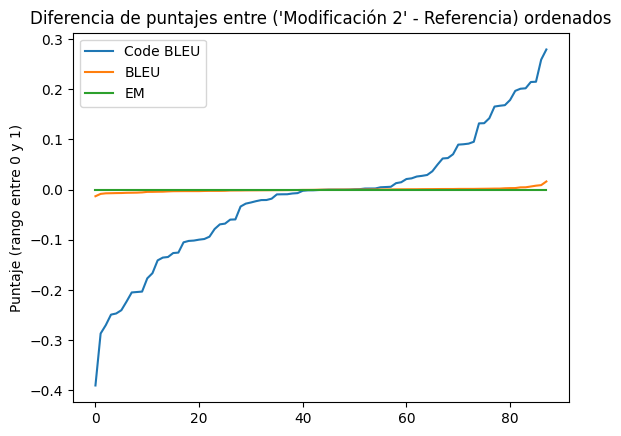

In [ ]:
CodeBleu_Dif = dataset.sort_values(by=["CodeBleu_Dif_test2"])["CodeBleu_Dif_test2"].tolist()
Bleu_Dif = dataset.sort_values(by=["Bleu_Dif_test2"])["Bleu_Dif_test2"].tolist()
EM_Dif = dataset.sort_values(by=["EM_Dif_test2"])["EM_Dif_test2"].tolist()

plt.plot(range(len(CodeBleu_Dif)), CodeBleu_Dif, label="Code BLEU")
plt.plot(range(len(Bleu_Dif)), Bleu_Dif, label="BLEU")
plt.plot(range(len(EM_Dif)), EM_Dif, label="EM")

plt.legend()

plt.title("Prueba 2: Diferencia de puntajes entre ('Modificación 1' - Referencia) ordenados")
plt.ylabel("Puntaje (rango entre 0 y 1)")

Text(0, 0.5, 'Puntaje (rango entre 0 y 1)')

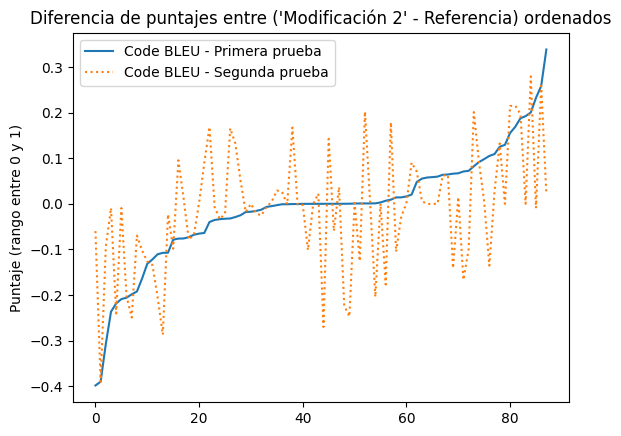

In [ ]:
CodeBleu_Dif_test1 = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
CodeBleu_Dif_test2 = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif_test2"].tolist()

plt.plot(range(len(CodeBleu_Dif_test1)), CodeBleu_Dif_test1, label="Code BLEU - Primera prueba")
plt.plot(range(len(CodeBleu_Dif_test2)), CodeBleu_Dif_test2, label="Code BLEU - Segunda prueba", linestyle='dotted')

plt.legend()

plt.title("Diferencia de puntajes entre pruebas ordenados por prueba 1")
plt.ylabel("Puntaje (rango entre 0 y 1)")